## Happy Customers

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [19]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


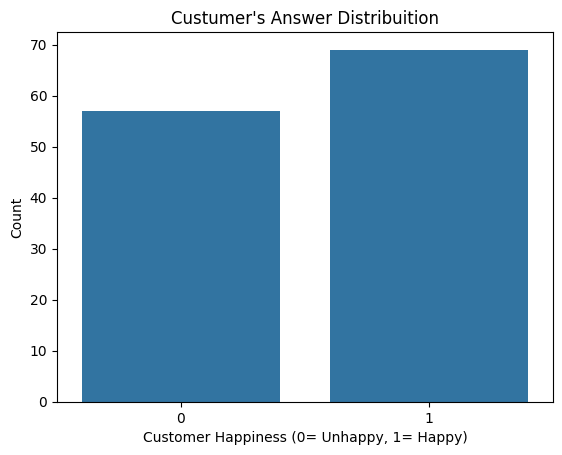

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Y', data=df)
plt.title("Custumer's Answer Distribuition")
plt.xlabel("Customer Happiness (0= Unhappy, 1= Happy)")
plt.ylabel("Count")
plt.show()

In [75]:
rows = df.shape[0]
print(f'Class\t\t\trows\t%\nPossitive(1 = Happy)  \t{df[df['Y']==1].shape[0]} \t{(100*df[df['Y']==1].shape[0]/rows):.1f}')
print(f'Negative(0 = Unhappy)\t{df[df['Y']==0].shape[0]} \t{(100*df[df['Y']==0].shape[0]/rows):.1f}')

Class			rows	%
Possitive(1 = Happy)  	69 	54.8
Negative(0 = Unhappy)	57 	45.2


In [86]:
features = [ 'X' + str(i) for i in range(1,7,1)]


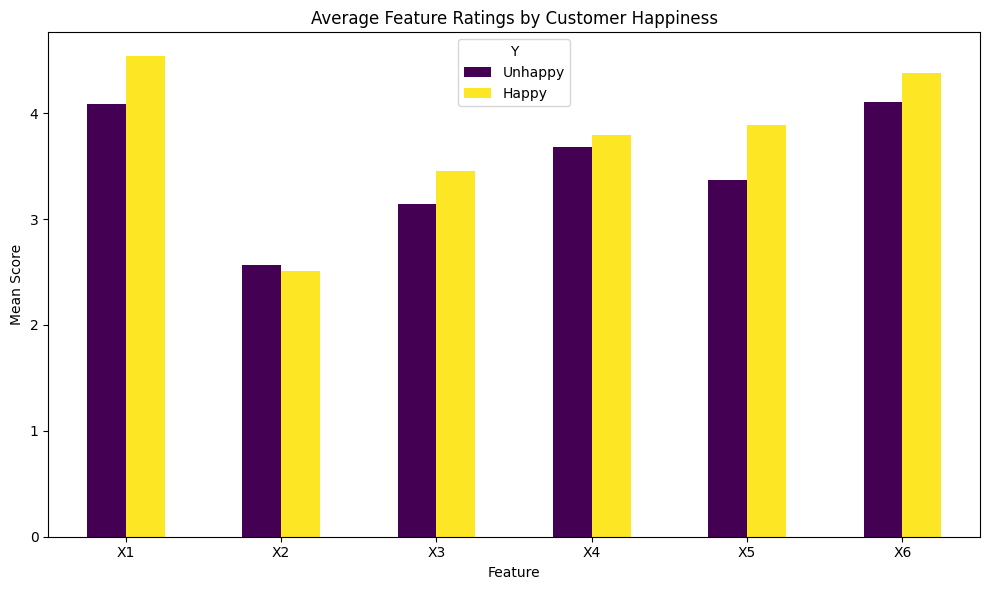

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

means = df.groupby('Y')[features].mean().T
means.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Feature Ratings by Customer Happiness')
plt.ylabel('Mean Score')
plt.xlabel('Feature')
plt.xticks(rotation=0)
plt.legend(title='Y', labels=['Unhappy', 'Happy'])
plt.tight_layout()
plt.show()

##### X1 = my order was delivered on time
##### X2 = contents of my order was as I expected
##### X3 = I ordered everything I wanted to order
##### X4 = I paid a good price for my order
##### X5 = I am satisfied with my courier
##### X6 = the app makes ordering easy for me

In [170]:
df.groupby('Y').mean()

,X1,X2,X3,X4,X5,X6
Y,,,,,,
0,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
1,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812


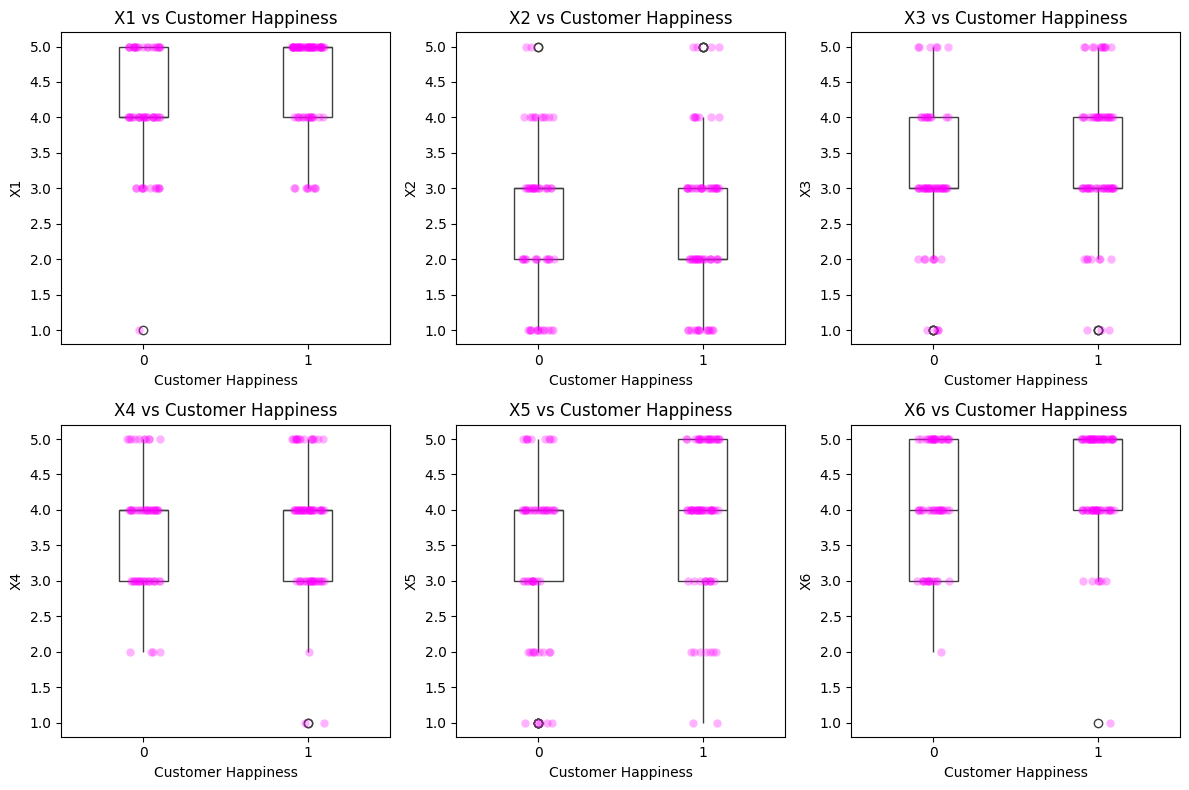

In [174]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='Y', y=col, data=df, ax=axes[i],
                width=0.3, showcaps=False,
                boxprops={'facecolor': 'None'})
    sns.stripplot(x='Y', y=col, data=df,
                  ax=axes[i], size=6, color='magenta', alpha=.3)
    axes[i].set_title(f'{col} vs Customer Happiness')
    axes[i].set_xlabel('Customer Happiness')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [142]:
print(df.duplicated().sum())

16


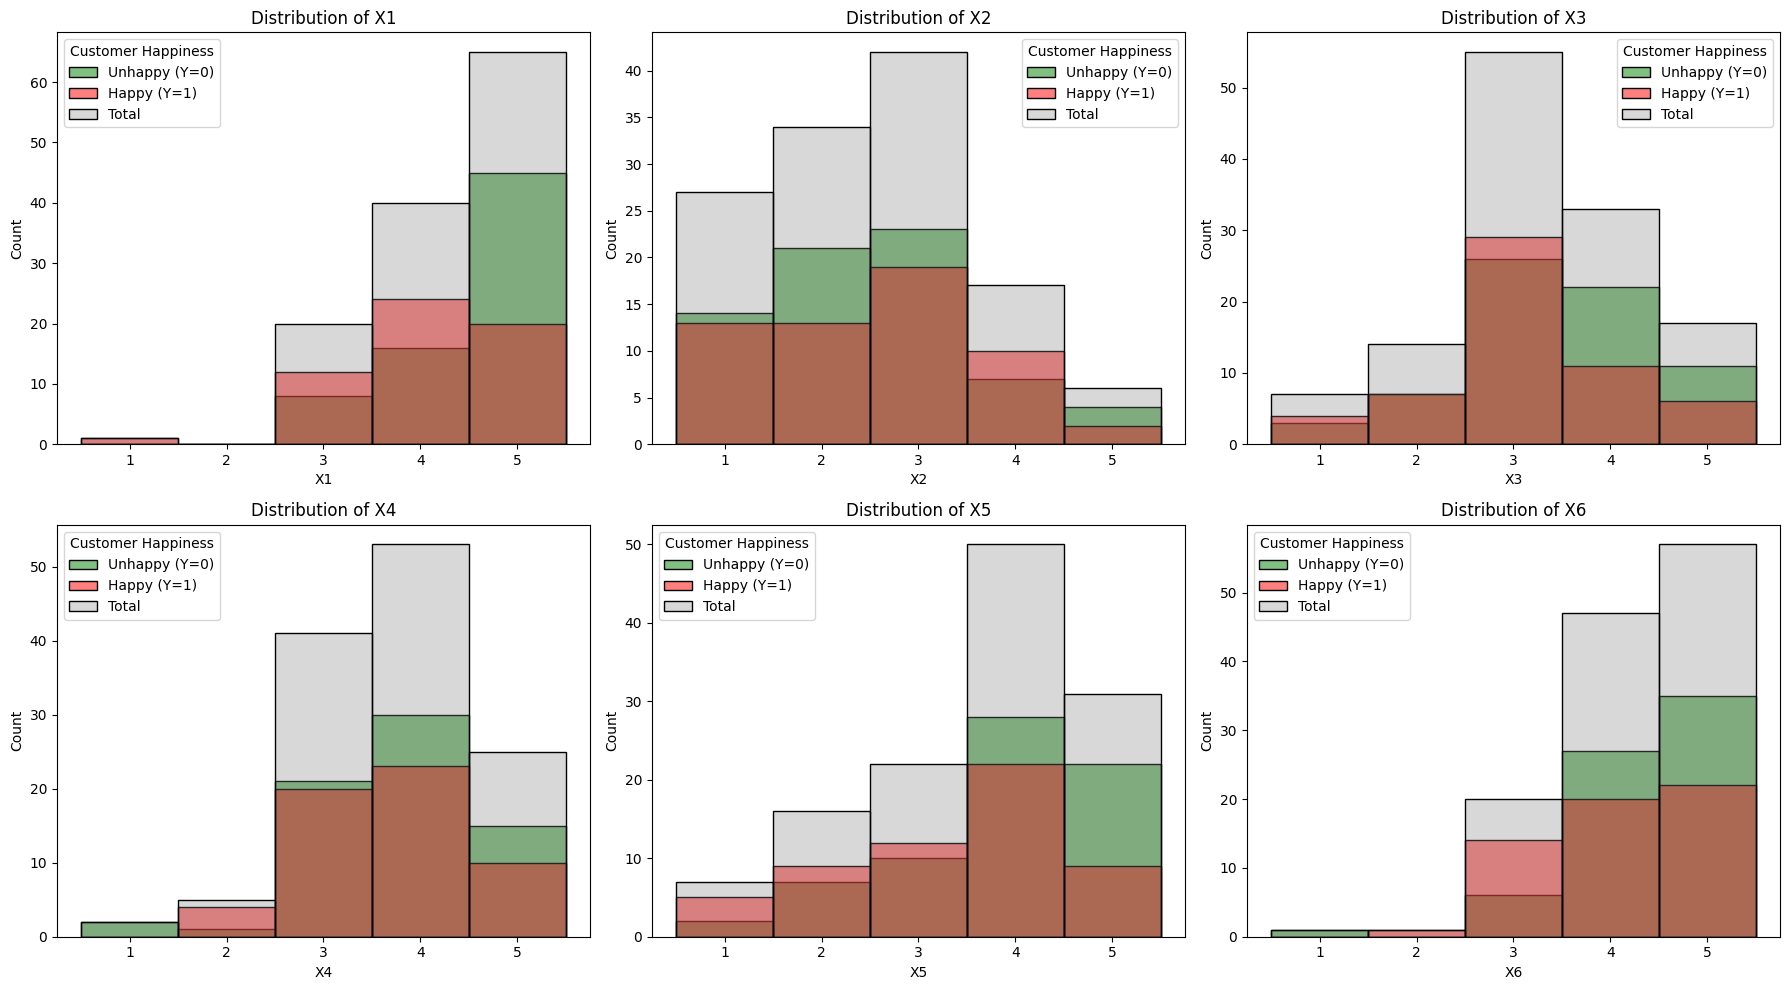

In [205]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(data=df, x=col, hue='Y', multiple='layer',
                 palette={0: 'red', 1: 'green'}, edgecolor='black',
                 stat='count', common_bins=True, bins=5, discrete=True, ax=axes[i])

    sns.histplot(data=df, x=col, color='gray', bins=5, discrete=True,
                 stat='count', edgecolor='black', label='Total', ax=axes[i], alpha=0.3)

    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend(title='Customer Happiness', labels=['Unhappy (Y=0)', 'Happy (Y=1)', 'Total'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


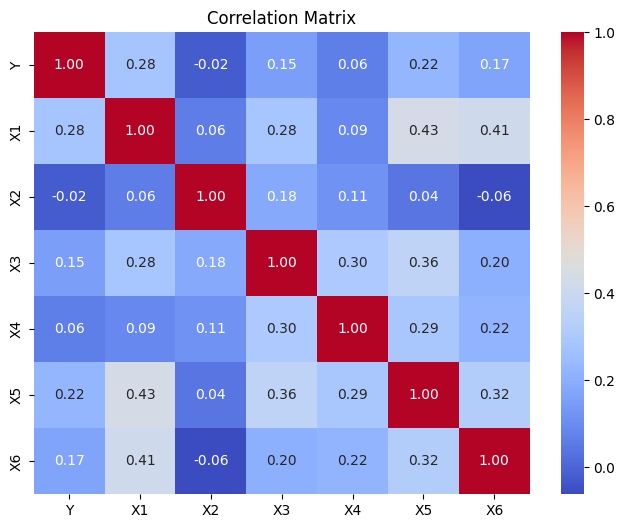

In [172]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Main observations:
**Top correlated features** with 'Y' (Customer happiness): 'On-time delivery (X1)' = 0.28, 'courier satisfaction (X5)' = 0.22 and 'app usability (X6)' = 0.17

**Features with low or negative correlation** to 'Y': 'Order was as expected (X2)' = -0.02, 'Good price (X4)' = 0.06

----

# Experimenting with Prediction Models

In [278]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['Y']
# Split the sets using stratify because of the class imbalance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23) 

In [280]:
print(f'Train set class balance. \nSet\tPossitive\tNegattive\nTrain \t{100*Y_train[Y_train == 1].shape[0] / Y_train.shape[0]} %\t\t {100*Y_train[Y_train == 0].shape[0] / Y_train.shape[0]}%')
print(f'Test \t{(100*Y_test[Y_test == 1].shape[0] / Y_test.shape[0]):.1f} %\t\t {(100*Y_test[Y_test == 0].shape[0] / Y_test.shape[0]):.1f}%')

Train set class balance. 
Set	Possitive	Negattive
Train 	55.0 %		 45.0%
Test 	53.8 %		 46.2%


#### Logistic Regression

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

In [286]:
print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_LR), 2))
print(classification_report(y_test, y_pred_LR))

Logistic Regression Accuracy: 0.38
              precision    recall  f1-score   support

           0       0.38      0.50      0.43        12
           1       0.40      0.29      0.33        14

    accuracy                           0.38        26
   macro avg       0.39      0.39      0.38        26
weighted avg       0.39      0.38      0.38        26



### Random Forest

In [292]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(random_state=23)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)


In [294]:
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_RF), 3))
print(classification_report(y_test, y_pred_RF))

Random Forest Accuracy: 0.538
              precision    recall  f1-score   support

           0       0.50      0.75      0.60        12
           1       0.62      0.36      0.45        14

    accuracy                           0.54        26
   macro avg       0.56      0.55      0.53        26
weighted avg       0.57      0.54      0.52        26



### XGBoost

In [307]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=23
)

model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)


In [309]:
print("XGBoost Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 3))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        12
           1       0.55      0.43      0.48        14

    accuracy                           0.50        26
   macro avg       0.51      0.51      0.50        26
weighted avg       0.51      0.50      0.50        26



## Observation: 
**The target accuracy of 73% is significantly higher than the results obtained using popular classification models. To close this gap, we will experiment with feature engineering techniques.**
